In [50]:
! pip install pandas
! pip install matplotlib
! pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import sqlite3
import pandas as pd

# load CSV
df = pd.read_csv("C:\\Users\\gokul\\Desktop\\retail_store_sales.csv")


# create a connection
conn = sqlite3.connect(":memory:")

# put CSV into SQL table
df.to_sql("mytable", conn, index=False, if_exists="replace")

# run SQL query
query = "SELECT * FROM mytable LIMIT 5"
result = pd.read_sql(query, conn)
print(result)


  Transaction ID Customer ID       Category          Item  Price Per Unit  Quantity  Total Spent  Payment Method Location Transaction Date  Discount Applied
0    TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5      10.0        185.0  Digital Wallet   Online       2024-04-08               1.0
1    TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0       9.0        261.0  Digital Wallet   Online       2023-07-23               1.0
2    TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5       2.0         43.0     Credit Card   Online       2022-10-05               0.0
3    TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5       9.0        247.5     Credit Card   Online       2022-05-07               NaN
4    TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5       7.0         87.5  Digital Wallet   Online       2022-10-02               0.0


In [78]:
print(df.isnull().sum())

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64


In [79]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())
df['Payment Method'] = df['Payment Method'].fillna("Unknown")
df['Category'] = df['Category'].fillna("Unknown")
df['Item'] = df['Item'].fillna("Unknown")
df['Location'] = df['Location'].fillna("Unknown")
df['Discount Applied'] = df['Discount Applied'].fillna("False")

In [80]:
print(df.isnull().sum())

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64


In [81]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [82]:
df['Category'] = df['Category'].str.strip().str.title()
df['Payment Method'] = df['Payment Method'].str.strip().str.title()
df['Item'] = df['Item'].str.strip()
df['Location'] = df['Location'].str.strip()

In [57]:
print(df.dtypes)

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object


In [58]:
print(df.duplicated().sum())

0


In [59]:
print(df.head())

  Transaction ID Customer ID       Category          Item  Price Per Unit  Quantity  Total Spent  Payment Method Location Transaction Date Discount Applied
0    TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5      10.0        185.0  Digital Wallet   Online       2024-04-08             True
1    TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0       9.0        261.0  Digital Wallet   Online       2023-07-23             True
2    TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5       2.0         43.0     Credit Card   Online       2022-10-05            False
3    TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5       9.0        247.5     Credit Card   Online       2022-05-07            False
4    TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5       7.0         87.5  Digital Wallet   Online       2022-10-02            False


In [60]:
print(df.describe(include='all'))

       Transaction ID Customer ID   Category     Item  Price Per Unit      Quantity   Total Spent Payment Method Location Transaction Date Discount Applied
count           12575       12575      12575    12575    12575.000000  12575.000000  12575.000000          12575    12575            12575            12575
unique          12575          25          8      201             NaN           NaN           NaN              3        2             1114                3
top       TXN_6867343     CUST_05  Furniture  Unknown             NaN           NaN           NaN           Cash   Online       2022-05-30             True
freq                1         544       1591     1213             NaN           NaN           NaN           4310     6354               26             4219
mean              NaN         NaN        NaN      NaN       23.348191      5.558648    128.636581            NaN      NaN              NaN              NaN
std               NaN         NaN        NaN      NaN       10.4

In [61]:
query = """
SELECT Item, SUM([Total Spent]) as total_sales
FROM mytable
GROUP BY Item
ORDER BY total_sales DESC
LIMIT 5
"""
top_items = pd.read_sql(query, conn)
print(top_items)


          Item  total_sales
0         None      79072.5
1  Item_25_FUR      25256.0
2  Item_25_EHE      23083.0
3  Item_25_BUT      21894.0
4  Item_24_FUR      21172.0


In [62]:
query = """
SELECT Category, SUM([Total Spent]) as total_sales
FROM mytable
GROUP BY Category
ORDER BY total_sales DESC
"""
category_sales = pd.read_sql(query, conn)
print(category_sales)


                             Category  total_sales
0                            Butchers     208118.0
1       Electric household essentials     203813.5
2                           Beverages     197047.5
3                           Furniture     195310.0
4                                Food     194812.0
5  Computers and electric accessories     190692.5
6                          Patisserie     182165.5
7                       Milk Products     180112.0


In [63]:
query = """
SELECT [Payment Method], COUNT(*) as transaction_count
FROM mytable
GROUP BY [Payment Method]
"""
payment_dist = pd.read_sql(query, conn)
print(payment_dist)


   Payment Method  transaction_count
0            Cash               4310
1     Credit Card               4121
2  Digital Wallet               4144


In [64]:
query = """
SELECT [Customer ID], AVG([Total Spent]) as avg_spent
FROM mytable
GROUP BY [Customer ID]
ORDER BY avg_spent DESC
LIMIT 5
"""
top_customers = pd.read_sql(query, conn)
print(top_customers)


  Customer ID   avg_spent
0     CUST_03  136.347534
1     CUST_04  135.752747
2     CUST_23  134.110187
3     CUST_19  133.035011
4     CUST_02  132.861884


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


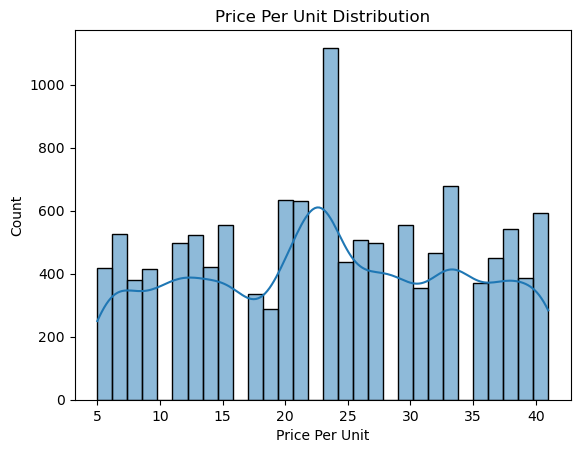

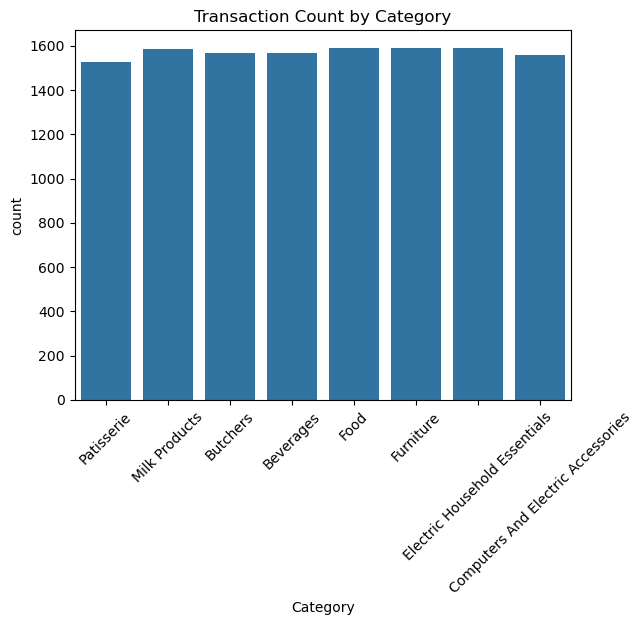

In [66]:
# Price distribution
sns.histplot(df["Price Per Unit"], bins=30, kde=True)
plt.title("Price Per Unit Distribution")
plt.show()

# Categories
sns.countplot(x="Category", data=df)
plt.xticks(rotation=45)
plt.title("Transaction Count by Category")
plt.show()

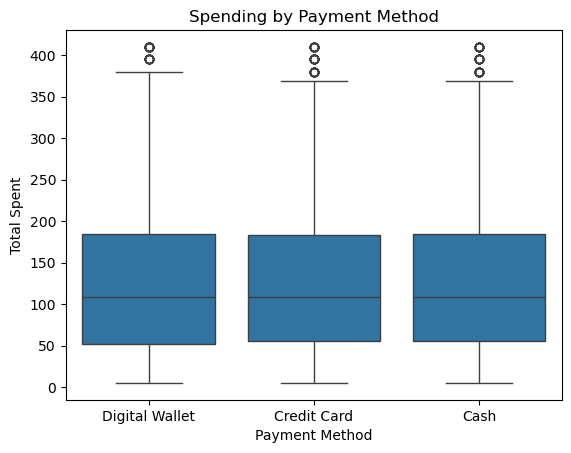

In [67]:
sns.boxplot(x="Payment Method", y="Total Spent", data=df)
plt.title("Spending by Payment Method")
plt.show()


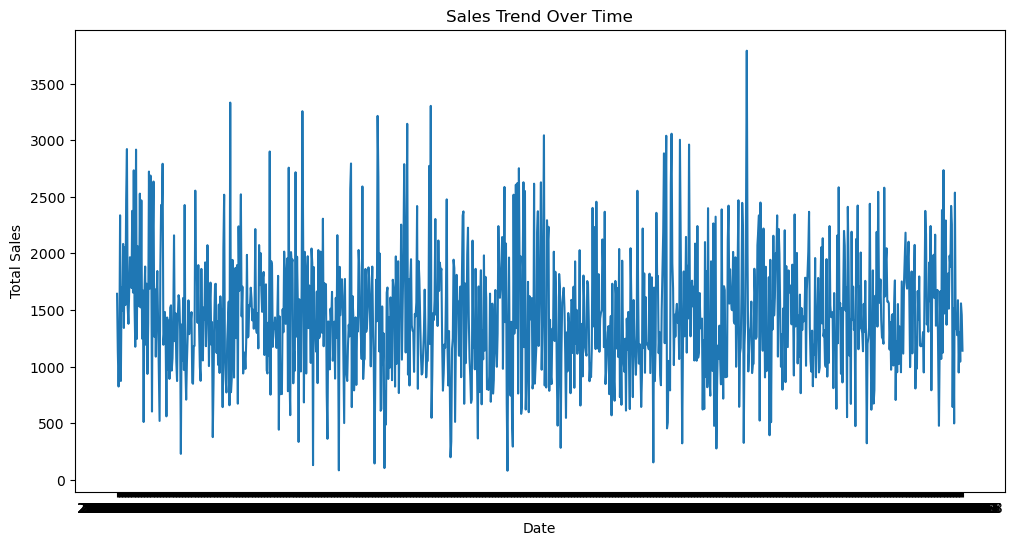

In [72]:
# sales over time
sales_over_time = df.groupby("Transaction Date")["Total Spent"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(sales_over_time["Transaction Date"], sales_over_time["Total Spent"])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


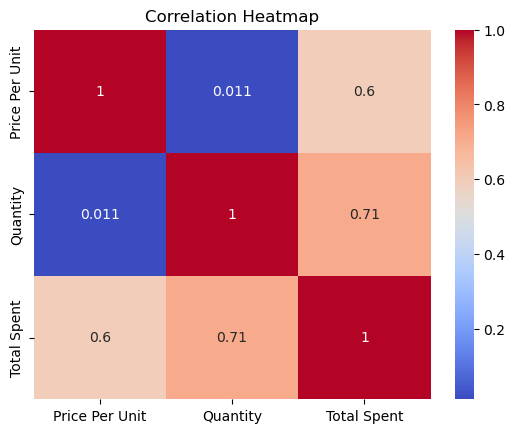

In [71]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [69]:
df.to_csv("cleaned_retail_store_sales.csv",index=False)